#  <div class="text-center">TP3 </div>

Exercice 1. (Le jeu de données contaminé par le robot)
Nous travaillons sur la base de données diabetes de python. La base initiale comporte n “ 442
patients et p “ 10 covariables. La variable Y à expliquer est un score correspondant à l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en y ajoutant 200 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti notre jeu de données, il a volon- tairement mélangé les variables entre elle de façon aléatoire. Bien entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous ne connaissons pas les variables pertinentes. La nouvelle base de données comporte n “ 442 patients et p “ 210 covariables, notés X. Saurez-vous déjouer les plans de ce robot farceur et retrouver les variables pertinentes ?

### 1) Import des données

 Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expli- quer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives et le nombre d’observations.

In [1]:
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from numpy.linalg import matrix_rank


In [2]:
#Il s'agit du dictionnaire des coefficients de déterminations pour chacune des méthodes employées durant ce TP
scoresTP=dict()

In [3]:
df= pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", ",", header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


Il y a 211 colonnes dans le dataset dont une de label, ce qui fait 210 variables explicatives avec 442 observations.

In [4]:
print(df.shape)

(442, 211)


## 2) 
Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres). Commenter les graphiques obtenus.

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


In [6]:
meandf=pd.DataFrame(np.abs(df.mean()))
meandfnonzero=meandf.loc[meandf[0]>10**-10]
print(meandfnonzero)

              0
210  152.133484


In [7]:
stddf=pd.DataFrame(df.std())
stddfnon1=stddf.loc[np.abs(stddf[0]-1)>10**-2]
print(stddfnon1)

             0
210  77.093005


Les variables explicatives sont centrées et normalisées.La variance peut être quelque peu différente de 1 en raison de l'estimateur biaisé. La variable y à expliquer ne l'est pas, ni normalisée ni centrée.

In [8]:
Xdf = df.drop([210], 1)
ydf = df[210]

In [9]:
randomX= df.sample(4, axis=1)
randomX["y"]=ydf


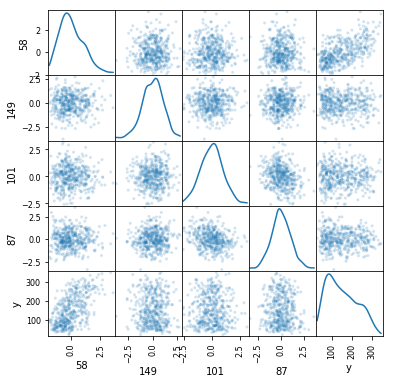

In [10]:
scatter_matrix(randomX, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

Les variables semblent avoir une distribution normale. Ce graph peut également montrer la corrélation entre les variables. (en fonction des variables sélectionnées aléatoirement)

## 3)
Donner la matrix des correlations. Tracer le graphes de la décroissance des valeurs propres de la matrice de corrélation. Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans la suite.

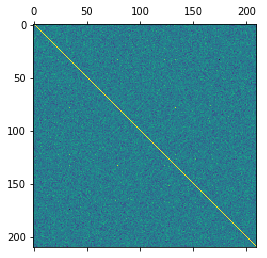

In [11]:
plt.matshow(Xdf.corr(),)
plt.show()

La matrice de corrélation peut par contre nous montrer certainement des corrélations entre les variables

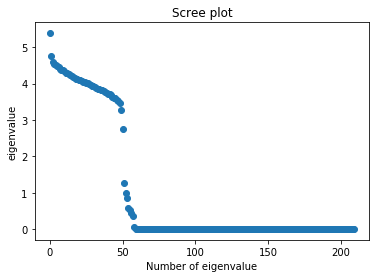

In [12]:
coveigenvalues, coveigenvectors= np.linalg.eigh(Xdf.cov())
eig_vals_sorted = np.sort(coveigenvalues)[::-1]
plt.scatter(np.arange(len(eig_vals_sorted)),eig_vals_sorted)
plt.xlabel("Number of eigenvalue")
plt.ylabel("eigenvalue")
plt.title("Scree plot")
plt.show()

Apres les 60 premières valeurs propres on a des valeurs propres négligeables, presque égale à 0.
Cela veut dire l'on peut exprimer très précisement les dernières composantes avec les 60 premières, principales. Le nouvel espace peut donc exprimer presque toute l'information contenue dans l'espace des 210 variables.

In [13]:
rangXdf=np.linalg.matrix_rank(Xdf)
print(rangXdf)

60


On voit ici que la matrice n'est pas de rang plein, de rang 60. Cela a donc un sens de ne garder que les 60 premieres composantes.

## 4)
Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle, un pour tester le modèle. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles de chacun des 2 échantillons.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(np.array(Xdf), np.array(ydf), test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 210)
(89, 210)
(353,)
(89,)


In [15]:
X_train_I = sm.add_constant(X_train)
X_test_I = sm.add_constant(X_test)

In [16]:
stc= StandardScaler()
X_train_cr = stc.fit_transform(X_train)
y_train_cr=(y_train-y_train.mean())/np.std(y_train)
X_test_cr = stc.fit_transform(X_test)
y_test_cr=(y_test-y_test.mean())/np.std(y_test)

Ci dessus les dimensions de nos matrices de train et de test (X puis y)

In [17]:
U, S, V = np.linalg.svd(X_train) 
#Je reconstruis les valeurs propres de la matrice de de gram grâce aux valeurs singulières
eigvals = S**2 / np.cumsum(S)[-1]

Ici nul besoin d'ordonner les valeurs propres car les valeurs singulières (S) le sont déjà 

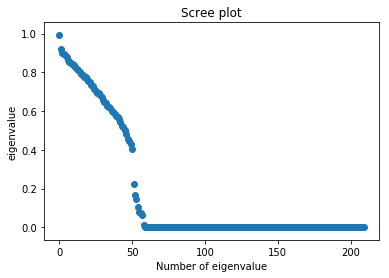

In [18]:

plt.figure()
plt.scatter(np.arange(len(eigvals)),eigvals)
plt.xlabel("Number of eigenvalue")
plt.ylabel("eigenvalue")
plt.title("Scree plot")
plt.show()


<div>Vérification<div>
On retrouve bien la même valeur 60 à partir de laquelle les valeurs propres sont négligeables

## 5) PCA before OLS
Suivant les observations de la question (Q3), appliquer la méthode de "PCA before OLS" qui consiste à faire une ACP avant la régression. On tracera les valeurs des coefficients de régression calculés (sans l’intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrées classique.

Ici je vais utiliser la svd pour faire la PCA. 
La PCA sert à réduire les dimensions de X (train) pour enlever l'information redondante et ne pas  travailler avec des matrices énormes et non inversibles (XtX^-1)

In [19]:
#Je prends d'abord les matrices complètes que je vais réduire moi même
U_train, S_train, V_train = np.linalg.svd(X_train)
eigvals = S_train**2 / np.cumsum(S_train)[-1]


Comme vu dans la question 3, on peut ne garder que les 60 premiers vecteurs et valeurs propres

In [20]:
#on réduit U S V
Ureduced = U_train[:,:60]
Sreduced = np.diag(S_train)[:60,:60]
Vreduced = V_train.T[:,:60]
Xreduced=Ureduced@Sreduced
#On projette XTrain sur le nouvel espace formé par les PCs de la PCA
Xpca = X_train@Vreduced
print(Xpca.shape)
print(np.sum(Xreduced-Xpca))

(353, 60)
-3.563285801947043e-13


J'ai réduit mon X_train qui comportait 210 colonnes à 60 colonnes. Ici on vérifie que XV=US

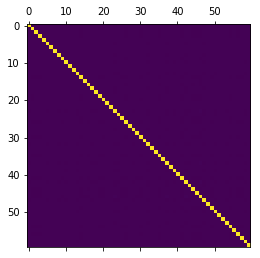

In [21]:
plt.matshow(pd.DataFrame(Xpca).corr())
plt.show()

Ici on vérifie que la matrice de corrélation n'indique plus de corrélation. En effet on a enlevé l'information redondante.

#### Maintenant on peut réaliser la regression linéaire avec notre nouvelle matrice Xpca issue de la PCA

In [22]:
#Ajout de l'intercept à Xpca
Xpca_I = sm.add_constant(Xpca)
gramPca=Xpca_I.T@Xpca_I
# Pour calculer Theta, on peut utiliser inv car il n'y a plus de corrélation maintenant
thetapca=np.linalg.inv(gramPca)@Xpca_I.T@y_train
#On projette Xtest sur l'espace PCA 
XtestPca= X_test@Vreduced
print(XtestPca.shape)
XtestPca_I= sm.add_constant(XtestPca)
ypredpca= XtestPca_I@thetapca

(89, 60)


On calcule le coefficient de détermination

In [23]:
R2pca=1-np.sum((ypredpca-y_test)**2)/np.sum((y_test-y_test.mean())**2)
scoresTP["PCA+OLS"]=R2pca
print(R2pca)

0.5232125361711574


On peut vérifier avec scikit learn le R2

In [24]:
# Choix de sklearn
regpca = LinearRegression()
regrpca = regpca.fit(Xpca, y_train)
print(regpca.score(XtestPca,y_test))

0.5232125361711575


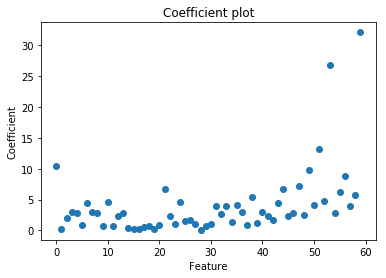

In [25]:

plt.figure()
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficient plot")
plt.scatter(np.arange(0,regrpca.coef_.shape[0]),np.abs(regrpca.coef_))
plt.show()

On fait l'OLS maintenant sur X_train (sans pca) pour comparer

In [26]:
rangXtrain=np.linalg.matrix_rank(X_train)
print(rangXtrain)

60


Comme montré auparavant, la matrice n'est pas de rang plein, ie on ne peut pas l'inverser, car comme le montre la matrice de corrélation elle contient de l'information redondante

X_train non inversible on prend la pseudoinverse

Je vais utiliser ici la fonction pinv de numpy.

In [27]:
thetaLR=np.linalg.pinv(X_train_I)@y_train
#thetaLR=np.linalg.inv(X_train_I.T@X_train_I)@X_train_I.T@y_train
ypredLR= X_test_I@thetaLR
RLR=1-np.sum((ypredLR-y_test)**2)/np.sum((y_test-y_test.mean())**2)
scoresTP["OLS"]=RLR
print(RLR)

0.5232125361711584


On trace également les coefficients obtenus

In [28]:
#on peut afficher les coefficients "non négligeables"
coefsplus2= np.where(np.abs(thetaLR[1:])>2)[0]
print(coefsplus2)

[ 34  58  79 123 129 133 135 167 174]


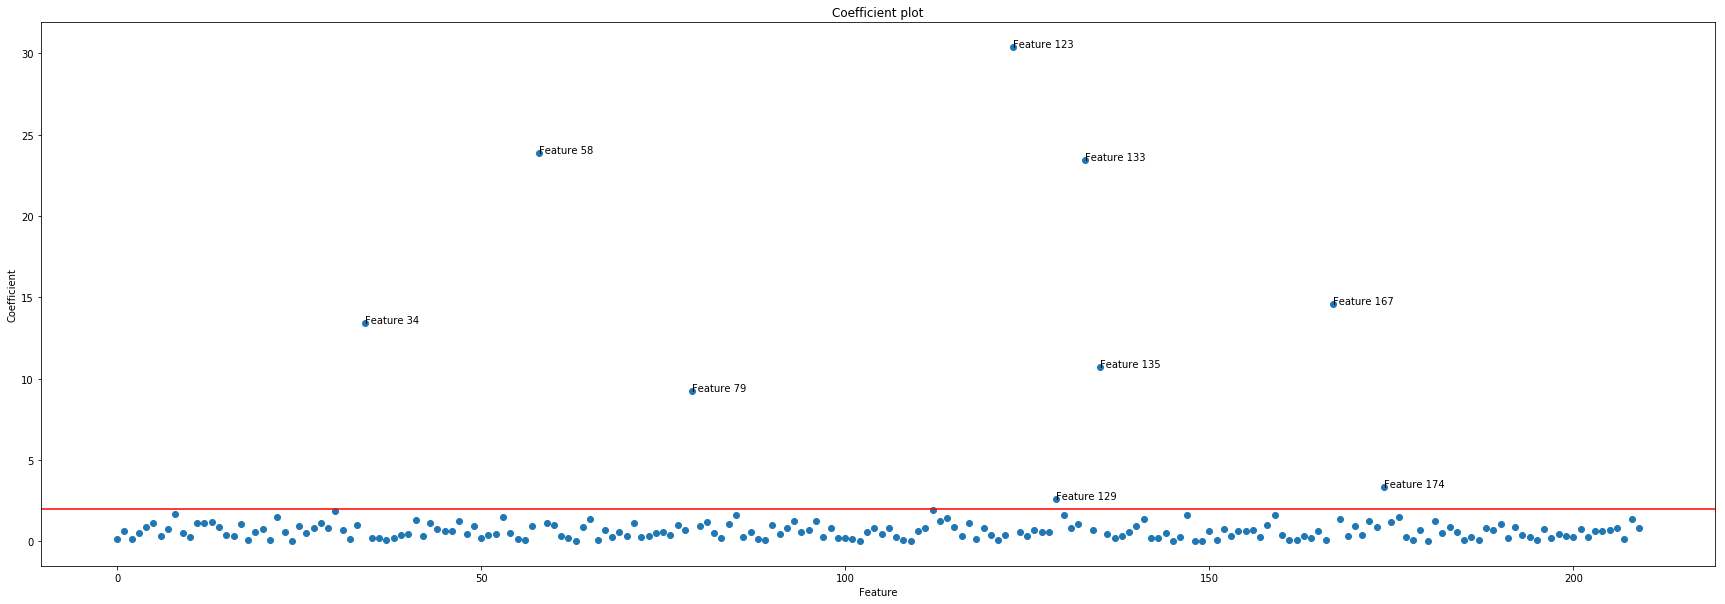

In [29]:
plt.figure(figsize=(30,10))
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficient plot")
plt.scatter(np.arange(0,210),np.abs(thetaLR[1:]))
#plt.scatter(coefsplus2,np.abs(thetaLR[coefsplus2+1]), marker="o")
for coef in coefsplus2:
    plt.annotate("Feature "+str(coef),(coef,np.abs(thetaLR[coef+1])) )
plt.axhline(y=2, color="red")

plt.show()

Dans le doute, j'utilise également la fonction LinearRegression de Scikit learn, mais je trouve des résultats beaucoup moins bons ou complètement abberants (R2). La corrélation donc les valeurs propres qui explosent doivent jouer sur le résultat. 

In [30]:
lrtrain= LinearRegression()
lrtrain.fit(X_train, y_train)
ypredlr= lrtrain.predict(X_test)
print(lrtrain.score(X_test, y_test))

0.3158600887718348


Je fais également un ols sur Xtrain en prenant l'inverse, le résultat n'est pas bon.

In [31]:
thetalrols=np.linalg.inv(X_train_I.T@X_train_I)@X_train_I.T@y_train
ypredlrols= X_test_I@thetalrols
Rlrols=1-np.sum((ypredlrols-y_test)**2)/np.sum((y_test-y_test.mean())**2)
print(Rlrols)

-2042.357877527134


## 6) Intercepts
Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sut le train.

On affiche les intercepts des coefficients obtenus par OLS et PCA + OLS

In [32]:
print(thetapca[0])
print(thetaLR[0])
print(y_train.mean())

152.83795248766444
152.83795248766435
153.5099150141643


On en conclut que les coefficient des OLS et PCA OLS sont sensiblement les mêmes et presque égaux à la moyenne de y_train. Cela est du au fait que les variables de X_train ne sont plus centrées ni normalisées car on a pris un échantillon de X. D'où le petit écart.

On standardise Xpca (centrage+ normalisation)

In [33]:
scaler = StandardScaler()
std = scaler.fit(Xpca)
XpcaStd = scaler.transform(Xpca)
thetapcaStd=np.linalg.inv(XpcaStd.T@XpcaStd)@XpcaStd.T@y_train
regpcaStd = LinearRegression()
regrpcaStd = regpcaStd.fit(XpcaStd, y_train)
print(regrpcaStd.intercept_)
print(y_train.mean())

153.5099150141643
153.5099150141643


Ici on vérifie bien que l'intercept est égal à la moyenne de y.

## 7)
Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

Ici je trace la valeur des résidus. Les prédictions avec pca before ols et ols sont les mêmes, donc les résidus également.

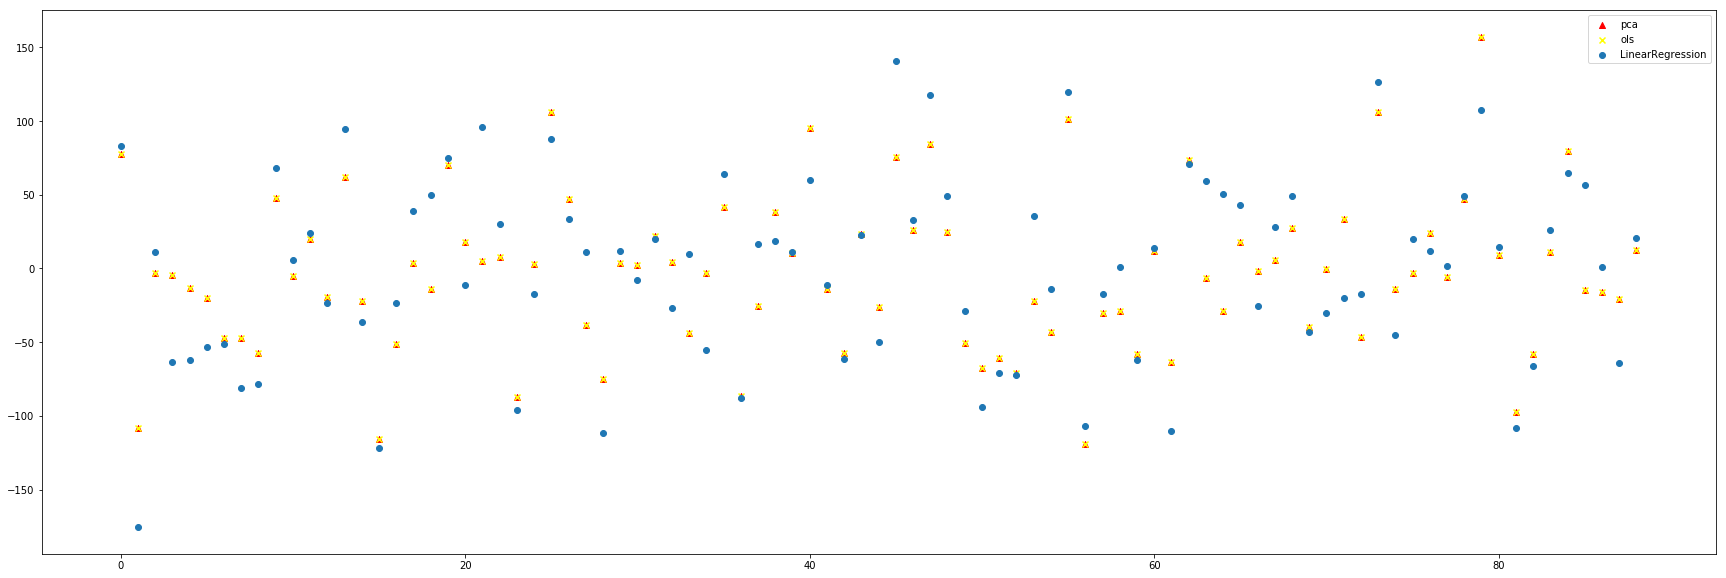

In [34]:
plt.figure(figsize=(30,10))

#plot des résidus issus de la pca
plt.scatter(np.arange(0,y_test.shape[0]) ,y_test-ypredpca,marker='^',c="red",label='pca')
#plot des résidus de l'OLS avec la pseudoinverse
plt.scatter(np.arange(0,y_test.shape[0]) ,y_test-ypredLR ,marker='x',c="yellow",label='ols' )

#plot des résidus scikit-learn LinearRegression
plt.scatter(np.arange(0,y_test.shape[0]) ,y_test-ypredlr,label='LinearRegression')
plt.legend()
plt.show()

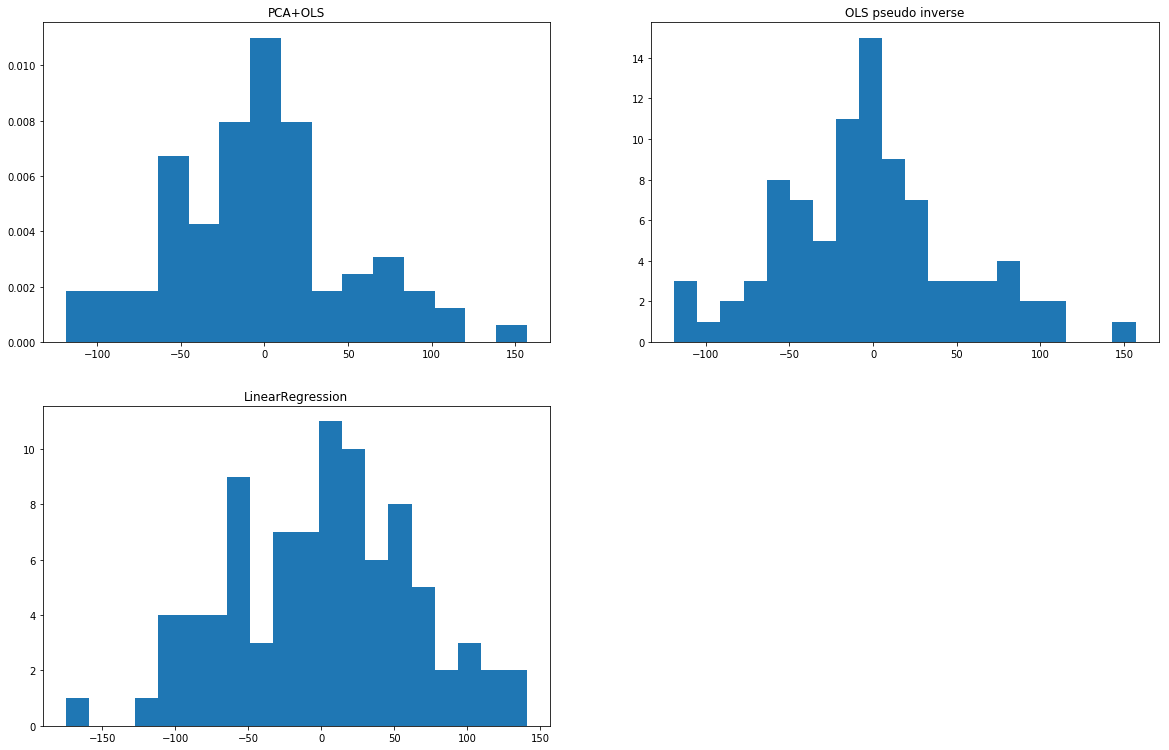

In [35]:
plt.figure(figsize=(20,20))
plt.subplot(321)
plt.title("PCA+OLS")
plt.hist(y_test-ypredpca, bins=15, density=True)
plt.subplot(322)
plt.title("OLS pseudo inverse")
plt.hist(y_test-ypredLR, bins=20)
plt.subplot(323)
plt.hist(y_test-ypredlr, bins=20)
plt.title("LinearRegression")

plt.show()

In [36]:
msepcaols= mean_squared_error(y_test,ypredpca)
mseols= mean_squared_error(y_test,ypredLR)
print("MSE score avec PCA {}".format(str(msepcaols)))
print("MSE score avec OLS {}".format(str(mseols)))
print("MSE score avec LinearRegression() {}".format(str(mean_squared_error(y_test,ypredlr))))

MSE score avec PCA 2789.9114011372103
MSE score avec OLS 2789.9114011372044
MSE score avec LinearRegression() 4003.2297052878034


In [37]:
rpredpcaols= matrix_rank(XtestPca_I)/(len(y_test)*(len(y_test)-matrix_rank(XtestPca_I)))*np.linalg.norm(y_test-ypredpca)**2
rpredols= matrix_rank(X_test)/(len(y_test)*(len(y_test)-matrix_rank(X_test)))*np.linalg.norm(y_test-ypredLR)**2
rpredlrsk= matrix_rank(X_test)/(len(y_test)*(len(y_test)-matrix_rank(X_test)))*np.linalg.norm(y_test-ypredlr)**2

print("Rpred  avec PCA {}".format(str(rpredpcaols)))
print("Rpred  avec OLS {}".format(str(rpredols)))
print("Rpred avec LinearRegression() {}".format(str(rpredlrsk)))

Rpred  avec PCA 6078.021266763207
Rpred  avec OLS 5772.230485111459
Rpred avec LinearRegression() 8282.544217836834


In [38]:
print("R2 score avec OLS "+str(RLR))
print("R2 score avec PCA +OLS "+str(R2pca))

R2 score avec OLS 0.5232125361711584
R2 score avec PCA +OLS 0.5232125361711574


Les coefficients de détermination respectivement de l'ols et PCA+OLS ci dessus sont à peu près les mêmes

## 8) Forward selection
Appliquer la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Afficher l’ordre de séléction des variables.

On définit la fonction de forward selection avec un seuil en paramètre pour répondre à la question 9 également

In [39]:

def forward_selection(Xfwd, threshold=1):

    p=Xfwd.shape[1]
    n=Xfwd.shape[0]
    r= y_train
    test = np.zeros((p,p))
    pval_mem = np.zeros(p)
    pval = np.zeros((p,p))
    resids = y_train
    var_sel = []
    var_remain = list(range(p))
    in_test = []
    #regr = LinearRegression(fit_intercept = False)
    
    for k in range(p): 
        resids_mem = np.zeros((p,n))
        #pour chaque variable explicative on fait une OLS en ajoutant l'intercept
        for i in var_remain:
            Xtemp=Xfwd [:,i]
            gramtemp=Xtemp.T@Xtemp
            rg=np.linalg.matrix_rank(gramtemp)
            thetatemp=Xtemp.T@resids/gramtemp
            ypredtemp=Xtemp*thetatemp
            resids_mem [i,:] =resids-ypredtemp
            sigma2_tmp= 1/(n)*np.sum((resids-ypredtemp)**2)
            stdtheta=np.sqrt(sigma2_tmp/gramtemp)
            #on calcule notre statistique de test : theta / std(theta)
            test[k,i] =  np.abs(thetatemp) / stdtheta 
            #On calcule notre pvalue selon la loi de student
            pval[k,i] =   (1-t.cdf(np.abs(test[k,i]), n-rg))*2

        best_var = np.argmax(test[k,:])
        var_sel.append(best_var)
        resids = resids_mem[best_var,:]
        if pval[k,best_var] > threshold:
            break
        pval_mem [k] = pval[k,best_var]
        var_remain = np.setdiff1d(var_remain,var_sel)
        
    return var_sel, test, pval_mem

On run la fonction ci dessus et on affiche les résultats dans un dataframe

In [40]:
#Definition des dataframe avec les colonnes correspondantes pour X_train et X_test
#X_trainfwd= np.append(np.ones((X_train.shape[0],1)), X_train, axis=1)
columns= np.append("intercept",range(0,210))
df_X_train=pd.DataFrame(X_train_I, columns=columns)

X_testfwd= np.append(np.ones((X_test.shape[0],1)), X_test, axis=1)
columns= np.append("intercept",range(0,210))
df_X_test=pd.DataFrame(X_test_I, columns=columns)

vfwd,tfwd,pfwd= forward_selection(X_train_I)
featureSelected= df_X_train.columns[vfwd]
display(pd.DataFrame(featureSelected  ))

,0
0,intercept
1,58
2,123
3,129
4,93
5,175
6,167
7,133
8,47
9,135


## 9) Forward selection avec un seuil de 0.1 sur la pvalue
Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées

Cette fois on run la fonction avec le paramètre de seuil 0.1

In [41]:
varfwd_selected,stats,pvalues = forward_selection(X_train_I, 0.1)
indexOfVarSelected= df_X_train.columns[varfwd_selected]

On plot les 3 premières itérations pour les variables sélectionnées

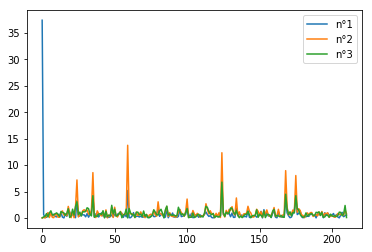

In [42]:
plt.plot(stats[0], label="n°1")
plt.plot(stats[1],label="n°2")
plt.plot(stats[2],label="n°3")
plt.legend()
plt.show()

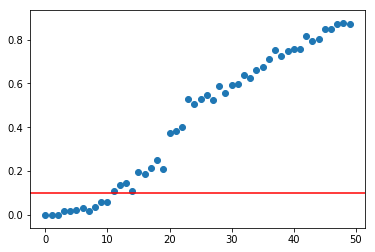

In [43]:
plt.scatter(range(0,50),pfwd[0:50], label="n°1")
plt.axhline(y=0.1, color='r', linestyle='-')
plt.show()

In [44]:
print(indexOfVarSelected)

Index(['intercept', '58', '123', '129', '93', '175', '167', '133', '47', '135',
       '141', '208'],
      dtype='object')


## 10) OLS sur les variables sélectionnées par forward selection
Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon test et le comparer à ceux de OLS et PCA before OLS.

In [45]:
#On construit notre nouvel X avec les colonnes sélectionnées
Xfwd=df_X_train[ indexOfVarSelected]
pdXfwd= pd.DataFrame(Xfwd)
pdXfwd.head()

,intercept,58,123,129,93,175,167,133,47,135,141,208
0,1.0,-0.742285,-1.476066,-0.437713,-1.179810,-0.978901,-0.553511,0.690208,0.527394,-0.938537,1.005371,-0.019154
1,1.0,-0.379729,0.005708,0.407998,-0.144062,1.415889,-0.698275,-0.437974,0.912845,1.065488,-0.072790,-0.975814
2,1.0,-0.651646,0.491428,-0.223357,1.832710,-0.224864,0.097929,0.516642,-0.872695,1.065488,0.791762,-0.439912
3,1.0,-0.175792,-1.359883,-0.072155,1.279606,-0.271360,-1.349715,-0.814035,-1.410397,-0.938537,0.316554,-1.044994
4,1.0,1.863581,0.616006,-0.427090,0.426327,0.720581,1.473191,0.429859,0.379225,1.065488,0.574870,-0.916055


In [46]:
# Pareil pour Xtest
Xtestfwd=df_X_test[indexOfVarSelected]
Xtestfwd.head()

,intercept,58,123,129,93,175,167,133,47,135,141,208
0,1.0,-1.626013,-1.516414,0.449787,-0.170074,-0.583196,-0.987804,-0.987601,1.120180,1.065488,-0.345224,0.195734
1,1.0,0.639957,0.694775,-1.149303,-0.226670,2.206461,-0.119218,1.731607,0.623535,-0.938537,0.576194,-0.892041
2,1.0,0.209423,0.358185,0.210831,0.589289,-0.173280,-0.915422,-2.029000,1.009813,1.065488,-0.348804,-2.490912
3,1.0,-0.742285,0.327274,-1.921854,0.765375,0.981157,1.328426,-0.090841,0.008018,1.065488,1.141910,0.252943
4,1.0,-0.130473,0.901830,-0.086457,-1.586190,0.266403,0.242693,1.326619,1.581337,-0.938537,0.560630,-0.073954


On fait notre prédiction sur ces nouveaux X_train et X_test

In [47]:
gram= Xfwd.T@Xfwd
B= np.linalg.inv(gram).dot(Xfwd.transpose().dot(y_train))
ypredFwd= Xtestfwd@B 
mse=np.sum((y_test-ypredFwd)**2)/len(y_test)
R2fwd= 1-np.sum((y_test-ypredFwd)**2)/np.sum((y_test-y_test.mean())**2)
rpredfwdols= matrix_rank(X_test)/(len(y_test)*(len(y_test)-matrix_rank(X_test)))*np.linalg.norm(y_test-ypredFwd)**2

print("R2={}".format(R2fwd))
print("mse={}".format(str(mse)))
print("Rpred={}".format(str(rpredfwdols)))

R2=0.5156071772087463
mse=2834.4139925194972
Rpred=5864.304812109304


Vérification avec les packages

In [48]:
regSelected= LinearRegression()
regSelected.fit(Xfwd, y_train)

pd.DataFrame(Xtestfwd).head()
scoreSelected= regSelected.score(Xtestfwd, y_test)
scoresTP["Fwd"]=scoreSelected
print("R2 avec forward selection= {}".format(str(scoreSelected)))
#print(regSelected.coef_)

R2 avec forward selection= 0.515607177208746


## 11) Validation croisée Kfold
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [49]:
kf = KFold(n_splits=4, shuffle=True)
foldsTrain= []
foldsTest= []
for train_index, test_index in kf.split(X_train):
    foldsTrain.append(train_index)
    foldsTest.append(test_index)
    
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [  0   1   3   4   5   8   9  10  12  13  14  15  16  17  18  20  21  22
  23  25  27  28  29  32  33  34  35  37  38  40  41  42  43  46  47  48
  50  51  53  54  55  58  59  60  61  62  65  68  70  71  72  73  74  75
  76  78  79  80  81  82  83  85  87  88  89  90  93  95  97  98  99 100
 101 103 104 105 106 107 108 109 111 112 114 115 116 117 118 120 121 124
 125 127 128 130 131 132 133 134 135 137 139 140 143 146 149 150 151 152
 153 154 156 157 158 160 162 163 165 166 167 169 170 172 173 174 175 177
 178 179 182 183 184 185 186 187 188 189 190 191 192 194 195 197 198 199
 201 203 204 206 207 208 210 213 214 215 216 218 220 221 222 223 224 225
 226 227 228 229 231 233 234 236 237 238 239 240 241 243 244 245 246 247
 249 251 252 253 254 255 256 257 258 259 260 261 263 264 265 266 267 269
 271 274 275 276 277 278 279 280 281 282 285 286 288 289 290 291 292 293
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 310 311 312 314
 315 316 317 318 320 321 322 323 324 325 326

In [50]:
pd.DataFrame(foldsTest).head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,2,6,7,11,19,24,26,30,31,36,...,309,313,319,327,329,332,338,343,346,350.0
1,4,9,14,15,17,29,33,34,40,48,...,317,318,320,321,322,330,335,340,344,NaN
2,1,3,5,8,10,12,13,20,22,27,...,328,334,336,341,342,345,347,349,351,NaN
3,0,16,18,21,23,25,32,38,42,43,...,324,325,326,331,333,337,339,348,352,NaN


## 12) Ridge
Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur du risque sur le test.


Définition de la fonction de cv pour lambda avec Ridge

In [51]:


def kFoldRidge(X, Y, lambdas):
    #kf = KFold(n_splits=4, shuffle=True, random_state=2)
    r2 = []
    mse_kfold_ridge=[]
    dfX= pd.DataFrame(X)
    dfY=pd.DataFrame(Y)
    for lmbd in lambdas:
        ridgeReg =  Ridge(alpha=lmbd)
        scores = []
        mses=[]
        for train_index, test_index in kf.split(X):
            X_traink, X_testk = dfX.take(train_index), dfX.take(test_index)
            Y_traink, Y_testk = dfY.take(train_index), dfY.take(test_index)
            ridgeReg.fit(X_traink, Y_traink)
            scores.append(ridgeReg.score(X_testk, Y_testk))
            mses.append(mean_squared_error(ridgeReg.predict(X_testk),Y_testk))
        r2.append(np.array(scores).mean())
        mse_kfold_ridge.append(np.array(mses).mean())
    return r2,mse_kfold_ridge

In [52]:
lambdas=[10**x for x in range(-5,5)]
r2_ridges, mse_ridges=kFoldRidge(X_train,y_train, lambdas)
print(r2_ridges)

[0.2527338294261662, 0.36363465535703965, 0.3106933511201856, 0.3333903827735927, 0.2895615119681611, 0.3826314691050712, 0.3328270563371587, 0.3272738154947781, 0.22288073105756473, 0.029882973490779313]


In [53]:
idx_best_lmbd=mse_ridges.index(np.array(mse_ridges).min())
bestLmbd= lambdas[idx_best_lmbd]
print(bestLmbd)

1


In [54]:
lambdas2=range(100)
r2_ridges2, mse_ridges2=kFoldRidge(X_train,y_train,lambdas2)
idx_best_lmbd2=mse_ridges2.index(np.array(mse_ridges2).min())
bestLmbd2= lambdas2[idx_best_lmbd2]
print(bestLmbd2)

23


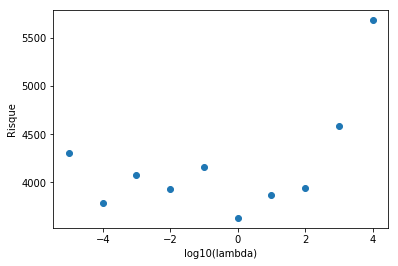

In [55]:

plt.scatter(np.log10(lambdas),mse_ridges )
plt.xlabel("log10(lambda)")
plt.ylabel("Risque")
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


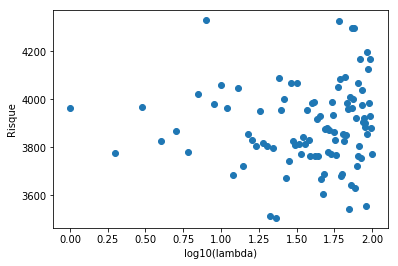

In [56]:
plt.scatter(np.log10(lambdas2),mse_ridges2 )
plt.xlabel("log10(lambda)")
plt.ylabel("Risque")
plt.show()

In [57]:
rr =  Ridge(alpha=bestLmbd2)
rr.fit(X_train, y_train)
R2rr=rr.score(X_test, y_test)
scoresTP["Ridge"]=R2rr
print("R2 score avec Ridge pour le best lambda "+str(R2rr))

R2 score avec Ridge pour le best lambda 0.5170190336853262


## 13) Lasso
A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner le risque de prédiction associé.

On commence par chercher le bon paramètre alpha par cross validation

In [58]:
#alphasLasso = np.array([10**x for x in range(-2,5)])
#lassoCV = LassoCV(alphas=alphasLasso)

lassoCV = LassoCV()
lassoCV.fit(X_train,y_train)
print(lassoCV.alpha_)

6.4656006851226575


On récupère les moyennes des MSE pour chacun des alphas 

In [59]:
avg_mse = np.mean(lassoCV.mse_path_,axis=1)
print(avg_mse)

[5911.673362   5764.29935644 5518.73843655 5302.46690338 5114.73450006
 4905.55978065 4710.48885538 4540.65836128 4392.79097713 4261.60219929
 4145.92235619 4045.62941308 3954.27966125 3874.76097013 3805.30952827
 3739.84290545 3681.30731165 3630.62098565 3584.92079993 3544.14352865
 3508.85041529 3479.31484576 3451.71847262 3429.56850711 3415.39376142
 3404.72600405 3395.62288916 3389.92725358 3386.48824884 3388.03491357
 3394.00851201 3404.99165053 3419.28876389 3438.38003989 3454.866963
 3470.6507159  3490.18697351 3513.18641909 3535.00734364 3557.04215158
 3579.01116374 3601.2982202  3622.82343761 3643.70142897 3665.65666129
 3690.03969858 3714.17953954 3737.45792476 3759.75579514 3779.77489636
 3799.88856031 3818.11062421 3836.47026755 3854.53202889 3872.98307544
 3891.32175964 3909.17738348 3926.45232166 3943.6559868  3960.15653798
 3975.73175512 3989.99358628 4003.51292244 4016.7270778  4029.2070263
 4041.5600204  4053.55453064 4065.00230452 4075.86601761 4086.08427539
 4095.782

In [60]:
#print(lcv.score(X_test,y_test))

In [61]:
print(np.nonzero(lassoCV.coef_))

(array([ 58, 112, 123, 129, 130, 167, 174]),)


On trace les moyennes des MSE pour chaque alpha

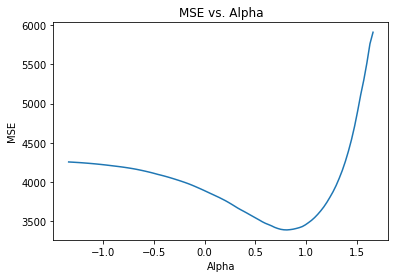

In [62]:
plt.plot(np.log10(lassoCV.alphas_),avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()

On récupère le meilleur lambda

In [63]:
print(lassoCV.alpha_)

6.4656006851226575


## 14) Least Square Lasso 
Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [64]:
scoresTP["lasso"]=lassoCV.score(X_test,y_test)
print("Le R2 lasso "+str(scoresTP["lasso"]))

Le R2 lasso 0.5224027474977249


In [65]:
indexCoeffLassoSelected= np.nonzero(lassoCV.coef_)
print(indexCoeffLassoSelected)
print("Il y a "+str(len(indexCoeffLassoSelected[0]))+" coefficients non nuls")

(array([ 58, 112, 123, 129, 130, 167, 174]),)
Il y a 7 coefficients non nuls


On reconstruit notre XLasso avec uniquement les variables sélectionnées par le lasso:

In [66]:
X_train_lasso=pd.DataFrame(X_train)[ indexCoeffLassoSelected[0]]
X_test_lasso=pd.DataFrame(X_test)[ indexCoeffLassoSelected[0]]

In [67]:
X_train_lasso.head()

,58,112,123,129,130,167,174
0,-0.742285,-0.538687,-1.476066,-0.437713,0.511630,-0.553511,2.106228
1,-0.379729,-0.536089,0.005708,0.407998,-1.507497,-0.698275,-1.531667
2,-0.651646,-0.875686,0.491428,-0.223357,0.001001,0.097929,-0.602843
3,-0.175792,-0.112545,-1.359883,-0.072155,0.153195,-1.349715,0.093776
4,1.863581,0.499575,0.616006,-0.427090,1.015046,1.473191,-1.067255


On applique l'OLS sur ce nouveau Xlasso

In [68]:
X_train_lasso_I= sm.add_constant(X_train_lasso)
X_test_lasso_I= sm.add_constant(X_test_lasso)


thetaLasso=np.linalg.inv(X_train_lasso_I.T@X_train_lasso_I)@X_train_lasso_I.T@y_train
#On projette Xtest sur l'espace PCA 
ypredLasso= X_test_lasso_I@thetaLasso


In [69]:
R2Lasso=1-np.sum((ypredLasso-y_test)**2)/np.sum((y_test-y_test.mean())**2)
scoresTP["LRlasso"]=R2Lasso
print("R2 pour Lasso "+str(R2Lasso))

R2 pour Lasso 0.5432815107425899


In [70]:
lrLasso= LinearRegression()
lrLasso.fit(X_train_lasso,y_train)
scoreLasso=lrLasso.score(X_test_lasso, y_test)
predLasso=lrLasso.predict(X_test_lasso)
print(scoreLasso)

0.5432815107425899


In [71]:
arra=np.append(predLasso.reshape(len(y_test),1),y_test.reshape(len(y_test),1), axis=1)
dfpredictlasso=pd.DataFrame(arra)
dfpredictlasso.head()

,0,1
0,57.009814,116.0
1,204.650469,122.0
2,163.773163,151.0
3,180.268638,185.0
4,171.428051,134.0


In [72]:
print(scoresTP)

{'PCA+OLS': 0.5232125361711574, 'OLS': 0.5232125361711584, 'Fwd': 0.515607177208746, 'Ridge': 0.5170190336853262, 'lasso': 0.5224027474977249, 'LRlasso': 0.5432815107425899}


In [73]:
pd.DataFrame.from_dict(scoresTP, orient='index')

,0
PCA+OLS,0.523213
OLS,0.523213
Fwd,0.515607
Ridge,0.517019
lasso,0.522403
LRlasso,0.543282


## 15) Ouverture
Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances moindres par rapport à OLS peuvent se produire. Commenter.

Ici nous allons essayer plusieurs modèles non linéaires avec des paramètres différents et comparer le R2

In [74]:
from sklearn import svm
#print(y_train)
clf = svm.SVR()
clf.fit(X_train_lasso, y_train)
R2SVM=clf.score(X_test_lasso,y_test)
print(R2SVM)

0.20671060307773959


In [75]:
from sklearn.linear_model import ElasticNet

regrEN = ElasticNet(random_state=0)
regrEN.fit(X_train_lasso, y_train)
R2EN=regrEN.score(X_test_lasso, y_test)
scoresTP["ElasticNet"]=R2EN

In [76]:
pd.DataFrame.from_dict(scoresTP, orient='index')

,0
PCA+OLS,0.523213
OLS,0.523213
Fwd,0.515607
Ridge,0.517019
lasso,0.522403
LRlasso,0.543282
ElasticNet,0.509614


In [77]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='lbfgs', alpha=100, hidden_layer_sizes=(1, 10))
nn.fit(X_train_lasso, y_train)
nn.score(X_test_lasso,y_test)

0.5667341724187911

In [78]:
from sklearn.model_selection import GridSearchCV

mlp=MLPRegressor(solver='lbfgs')
param_grid = {
    'hidden_layer_sizes': [(i,) for i in range(1,20)]
     ,
    'alpha': [10**x for x in range(-3,5)],
             }
GS = GridSearchCV(mlp, param_grid=param_grid, verbose=True)
GS.fit(X_train_lasso, y_train)
GS.best_estimator_

Fitting 3 folds for each of 152 candidates, totalling 456 fits


[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:   17.6s finished


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [79]:
R2MLP=GS.score(X_test_lasso,y_test)

In [80]:
scoresTP["MLP"]=R2MLP
print("R2 pour MLP "+str(R2MLP))

R2 pour MLP 0.5294016294902115


In [81]:
pd.DataFrame.from_dict(scoresTP, orient='index')

,0
PCA+OLS,0.523213
OLS,0.523213
Fwd,0.515607
Ridge,0.517019
lasso,0.522403
LRlasso,0.543282
ElasticNet,0.509614
MLP,0.529402
